In [1]:
import numpy as np
import pandas as pd

In [2]:
datapath="./data/diagnosis2.data"

original_data=pd.read_csv(datapath,sep='\t', 
                           names=['temperature', 'nausea', 'lumbar_pain', 'urine_pushing', 
                                 'micturition_pains', 'burning_of_urethra', 'inflamation', 'nephritis'])
original_data.shape

(120, 8)

In [3]:
original_data.columns

Index(['temperature', 'nausea', 'lumbar_pain', 'urine_pushing',
       'micturition_pains', 'burning_of_urethra', 'inflamation', 'nephritis'],
      dtype='object')

In [4]:
original_data.head()

,temperature,nausea,lumbar_pain,urine_pushing,micturition_pains,burning_of_urethra,inflamation,nephritis
0,"35,5",no,yes,no,no,no,no,no
1,"35,9",no,no,yes,yes,yes,yes,no
2,"35,9",no,yes,no,no,no,no,no
3,"36,0",no,no,yes,yes,yes,yes,no
4,"36,0",no,yes,no,no,no,no,no


In [5]:
original_data['temperature']=original_data['temperature'].apply(lambda x: x.replace(",","."))
original_data.head()

,temperature,nausea,lumbar_pain,urine_pushing,micturition_pains,burning_of_urethra,inflamation,nephritis
0,35.5,no,yes,no,no,no,no,no
1,35.9,no,no,yes,yes,yes,yes,no
2,35.9,no,yes,no,no,no,no,no
3,36.0,no,no,yes,yes,yes,yes,no
4,36.0,no,yes,no,no,no,no,no


In [6]:
type(original_data),type(original_data['temperature'])

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [7]:
from sklearn import preprocessing

le_nausea=preprocessing.LabelEncoder()
le_nausea.fit(original_data['nausea'])

LabelEncoder()

In [8]:
print(le_nausea.classes_)
print(le_nausea.transform(['no','yes','yes']))
print(le_nausea.inverse_transform([0,0,1]))

['no' 'yes']
[0 1 1]
['no' 'no' 'yes']


In [9]:
type(le_nausea.classes_)

numpy.ndarray

In [10]:
dicted_data=original_data.copy()
dicted_data['nausea']=le_nausea.transform(original_data['nausea'])

dicted_data.head()

,temperature,nausea,lumbar_pain,urine_pushing,micturition_pains,burning_of_urethra,inflamation,nephritis
0,35.5,0,yes,no,no,no,no,no
1,35.9,0,no,yes,yes,yes,yes,no
2,35.9,0,yes,no,no,no,no,no
3,36.0,0,no,yes,yes,yes,yes,no
4,36.0,0,yes,no,no,no,no,no


In [11]:
tmp = [ 'lumbar_pain'
      , 'urine_pushing'
      , 'micturition_pains'
      , 'burning_of_urethra'
      , 'inflamation'
      , 'nephritis' ]

les = {'nausea' : le_nausea}

for x in tmp:
    les[x] = preprocessing.LabelEncoder()
    dicted_data[x] = les[x].fit_transform(original_data[x])

dicted_data.head()

,temperature,nausea,lumbar_pain,urine_pushing,micturition_pains,burning_of_urethra,inflamation,nephritis
0,35.5,0,1,0,0,0,0,0
1,35.9,0,0,1,1,1,1,0
2,35.9,0,1,0,0,0,0,0
3,36.0,0,0,1,1,1,1,0
4,36.0,0,1,0,0,0,0,0


In [12]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree

y=dicted_data['inflamation']

features=['temperature']
x=dicted_data[features]

model=DecisionTreeClassifier(min_samples_split=20,random_state=99)

In [22]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: inflamation, dtype: int64

In [21]:
x.head()

,temperature
0,35.5
1,35.9
2,35.9
3,36.0
4,36.0


In [31]:
model.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=99, splitter='best')

['no' 'yes']


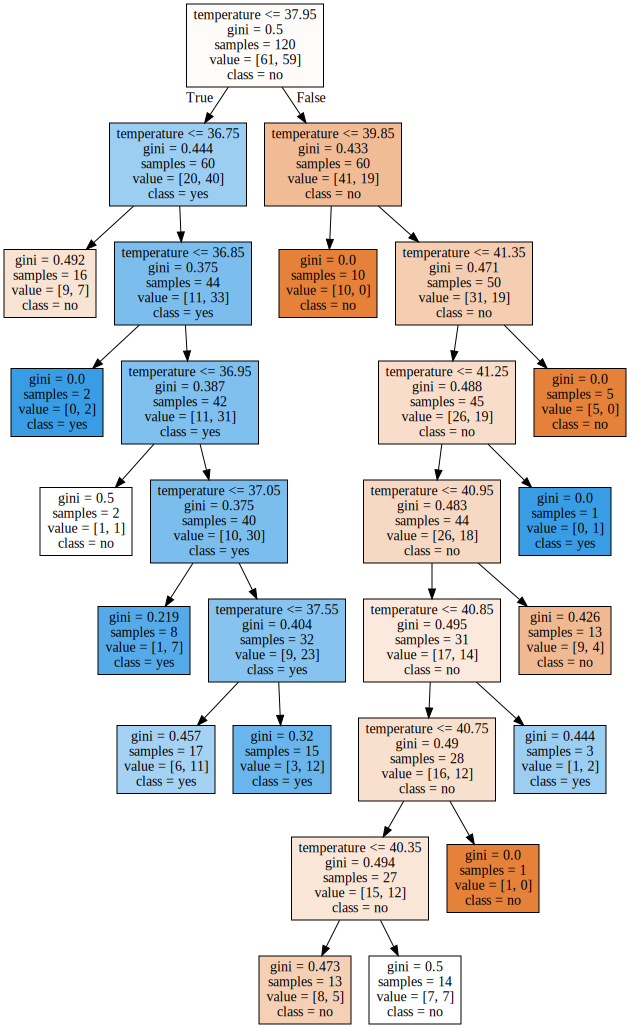

In [33]:
from graphviz import Source
from sklearn.tree import export_graphviz
from IPython.display import SVG

inflamation_labels=le_nausea.classes_
print(inflamtion_labels)

graph = Source(tree.export_graphviz( model, out_file=None,
                                     feature_names=features,
                                     class_names=inflamation_labels,
                                     filled=True))
display(SVG(graph.pipe(format="svg")))

In [34]:
pred_y = model.predict(x)
pred_y_prob = model.predict_proba(x)
print(np.shape(pred_y))
print(np.shape(pred_y_prob))

(120,)
(120, 2)


In [35]:
print('정답: ', y[0])
print('예측: ', pred_y[0])
print('확률: ', pred_y_prob[0])
print(model.classes_)

정답:  0
예측:  0
확률:  [0.5625 0.4375]
[0 1]


In [36]:
mean_accuracy = model.score(x, y)
print(mean_accuracy)

0.7083333333333334


In [37]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree

y=dicted_data['inflamation']
features=['temperature','nausea','urine_pushing','burning_of_urethra','lumbar_pain','micturition_pains']
x=dicted_data[features]

model=DecisionTreeClassifier(min_samples_split=20,random_state=99)

In [38]:
model.fit(x,y)
mean_accuracy=model.score(x,y)
print(mean_accuracy)

1.0


In [39]:
print(features)
print(model.feature_importances_)

['temperature', 'nausea', 'urine_pushing', 'burning_of_urethra', 'lumbar_pain', 'micturition_pains']
[0.         0.         0.48360656 0.         0.22586919 0.29052425]


In [40]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree

y=dicted_data['inflamation']
features=['urine_pushing']
x=dicted_data[features]

model=DecisionTreeClassifier(min_samples_split=20,random_state=99)

In [41]:
model.fit(x,y)
mean_accuracy=model.score(x,y)
print(mean_accuracy)

0.825


In [56]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split

features = ['temperature','urine_pushing',"lumbar_pain",'nausea',"micturition_pains","burning_of_urethra"]

train_d,test_d=train_test_split(dicted_data,test_size=0.1)

train_y=train_d['inflamation']
train_x=train_d[features]

test_y=test_d['inflamation']
test_x=test_d[features]
model=DecisionTreeClassifier(min_samples_split=20,random_state=99)

In [63]:
model=DecisionTreeClassifier(min_samples_split=2,random_state=99)
model.fit(train_x,train_y)

mean_accuracy_for_train=model.score(train_x,train_y)
print(mean_accuracy_for_train)

mean_accuracy_for_test=model.score(test_x,test_y)
print(mean_accuracy_for_test)

1.0
1.0


In [65]:
import pickle
modelpath="./model/prac001.model"
with open(modelpath,'wb') as f:
    pickle.dump(model,f)

In [66]:
import pickle
modelpath="./model/prac001.model"
with open(modelpath,'rb') as f:
    model_loaded=pickle.load(f)
    
mean_accuracy_for_test=model_loaded.score(test_x,test_y)
print(mean_accuracy_for_test)

1.0
